In [1]:
# Import libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [5]:
# Read the Data 
df = pd.read_csv(r"C:\Users\iniazy\Downloads\data_science.csv")
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [7]:
# Exploring Data 
df.shape

(607, 12)

In [11]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [17]:
df.duplicated().sum()

0

In [19]:
# Drop Unwanted Columns [Unnamed: 0	,salary]
df.drop(['Unnamed: 0','salary'], axis = 1, inplace = True)

In [21]:
df.head(2)

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,USD,260000,JP,0,JP,S


#### 1.Find the average salary by year

In [46]:
df1 = df.groupby('work_year')['salary_in_usd'].mean().round(2)
df1

work_year
2020     95813.00
2021     99853.79
2022    124522.01
Name: salary_in_usd, dtype: float64

In [48]:
df1.index

Index([2020, 2021, 2022], dtype='int64', name='work_year')

In [50]:
df1.values

array([ 95813.  ,  99853.79, 124522.01])

In [52]:
data = {
        'work_year' : df1.index,
        'average_salary' : df1.values 
}
df1 = pd.DataFrame(data)
df1

,work_year,average_salary
0,2020,95813.00
1,2021,99853.79
2,2022,124522.01


In [54]:
df1['average_salary'] = (df1['average_salary']/1000).round(2)

In [56]:
df1

,work_year,average_salary
0,2020,95.81
1,2021,99.85
2,2022,124.52


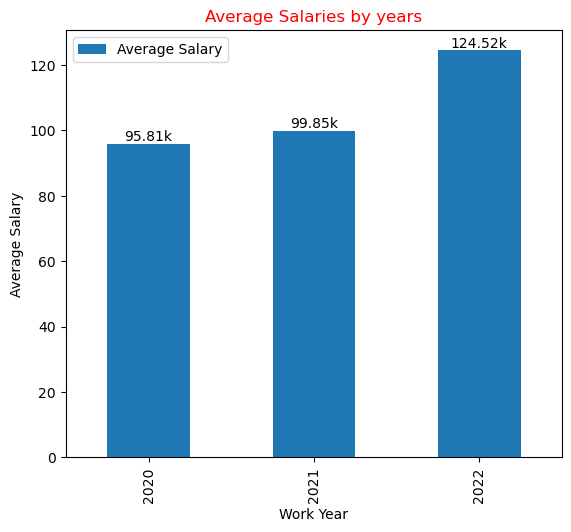

In [74]:
ax = df1.plot(kind = 'bar', x = 'work_year', y = 'average_salary', legend = True)
ax.bar_label(ax.containers[0], labels = df1['average_salary'].map('{:.2f}k'.format))
plt.subplots_adjust(top = 1.0)
ax.legend(['Average Salary'], loc = 'upper left')

plt.xlabel('Work Year')
plt.ylabel('Average Salary')
plt.title('Average Salaries by years', color = 'red')
plt.show()

#### 2-Find the remote_ratio

In [78]:
df2 = df['remote_ratio'].value_counts()
df2

remote_ratio
100    381
0      127
50      99
Name: count, dtype: int64

In [90]:
values = df2.to_list()

In [92]:
labels = ['Fully Remote','No Remote','Partially Remote']

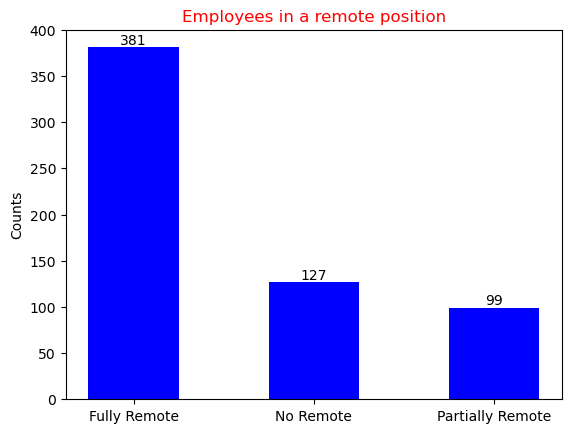

In [104]:
z = plt.bar(labels, values, width = 0.5, color = 'blue')
plt.bar_label(z, labels = values)
plt.title('Employees in a remote position', color ='red')
plt.ylabel('Counts')
plt.show()


#### 3-Company size based on year

In [130]:
df3 = df['company_size'].value_counts()
df3

company_size
M    326
L    198
S     83
Name: count, dtype: int64

In [132]:
df3.index.to_list()

['M', 'L', 'S']

In [134]:
values2 = df3.values

In [167]:
labels_for_company = ['Meduim','Large','Small']

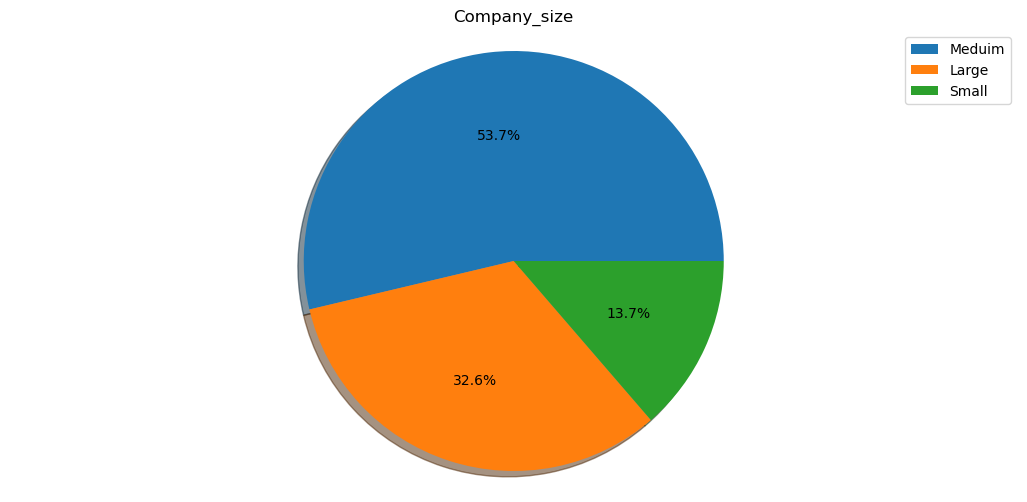

In [176]:
plt.figure(figsize = (13,6))
plt.pie(x = values2, autopct = '%1.1f%%', shadow = True)
plt.axis('equal')
plt.legend(labels = labels_for_company, loc = 'upper right')
plt.title('Company_size')
plt.show()

#### 4-Top 5 Job Titles

In [189]:
df4 = df['job_title'].value_counts()[:5]
df4

job_title
Data Scientist               143
Data Engineer                132
Data Analyst                  97
Machine Learning Engineer     41
Research Scientist            16
Name: count, dtype: int64

C:\Users\iniazy\AppData\Local\Temp\ipykernel_16048\2418857766.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df4.index, y = df4.values, palette = 'viridis' )


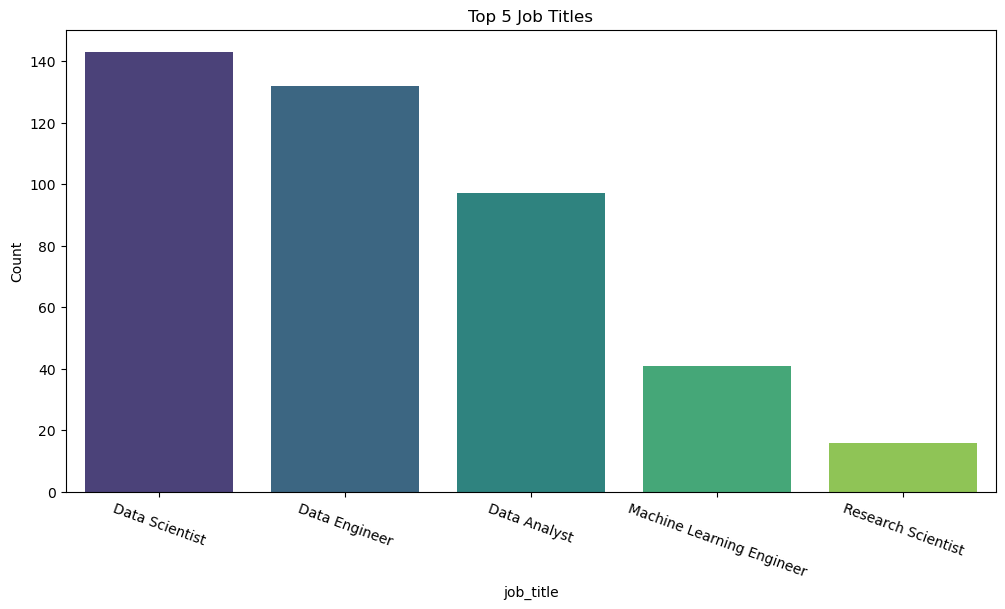

In [203]:
plt.figure(figsize = (12,6))
#plt.bar(x = df4.index, height = df4.values)
sns.barplot(x = df4.index, y = df4.values, palette = 'viridis' )
plt.title('Top 5 Job Titles')
plt.ylabel('Count')
plt.xticks(rotation = -20)
plt.show()

#### 5-The Distribution of salary by company size

In [208]:
df5 = df[['salary_in_usd','company_size']]
df5

,salary_in_usd,company_size
0,79833,L
1,260000,S
2,109024,M
3,20000,S
4,150000,L
...,...,...
602,154000,M
603,126000,M
604,129000,M
605,150000,M


In [216]:
S = df5[df5['company_size'] == 'S']
M = df5[df5['company_size'] == 'M']
L = df5[df5['company_size'] == 'L']

labels = ['Meduim', 'Large','Small']

sal_mean = [S['salary_in_usd'].mean(),M['salary_in_usd'].mean(),L['salary_in_usd'].mean()]

In [218]:
sal_mean

[77632.67469879518, 116905.46625766871, 119242.99494949495]

In [224]:
label_change = np.round([x/1000 for x in sal_mean],2)
label_change = list(map(str,label_change))
label_change = [x + ' K' for  x in label_change]
label_change

['77.63 K', '116.91 K', '119.24 K']

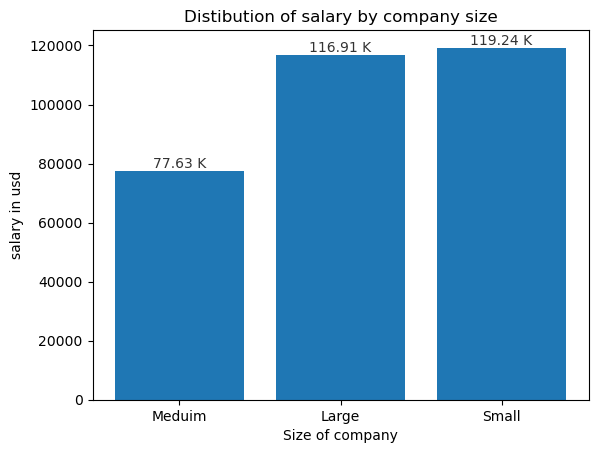

In [236]:
z = plt.bar(labels, sal_mean)
plt.bar_label(z,label_change, alpha = 0.8)
plt.title('Distibution of salary by company size')
plt.xlabel('Size of company')
plt.ylabel('salary in usd')
plt.show()

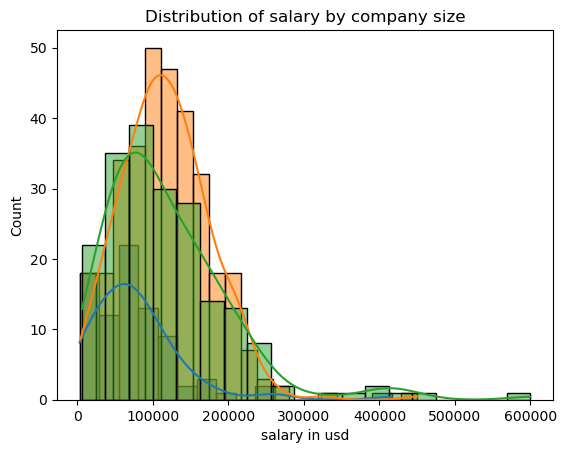

In [248]:
sns.histplot(S['salary_in_usd'], label = 'Small', kde = True)
sns.histplot(M['salary_in_usd'], label = 'Meduim', kde = True)
sns.histplot(L['salary_in_usd'], label = 'Large', kde = True)

plt.title('Distribution of salary by company size')
plt.xlabel('salary in usd')
plt.show()

#### 6-Experience level of employees

In [306]:
df6 = df['experience_level'].value_counts()
df6

experience_level
Seninours      280
Middle         213
Entry Level     88
Executive       26
Name: count, dtype: int64

In [312]:
df6.index.to_list()

['Seninours', 'Middle', 'Entry Level', 'Executive']

In [310]:
exp_map = {
    'SE' : 'Senior',
    'MI' : 'Middle',
    'EN' : 'Entry Level',
    'EX' : 'Executive'
}

In [300]:
df['experience_level'].replace(exp_map, inplace = True)

In [302]:
labels = df6.index.to_list()
labels

['Seninours', 'Middle', 'Entry Level', 'Executive']

In [304]:
values = df6.values
values

array([280, 213,  88,  26], dtype=int64)

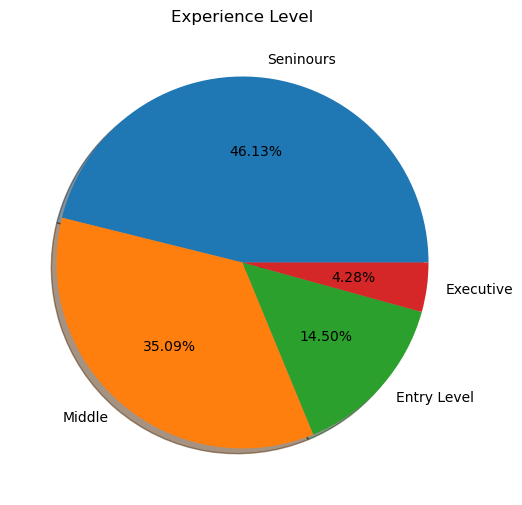

In [316]:
plt.figure(figsize = (6,12))
plt.pie(x = values, labels = labels, autopct = '%1.2f%%', shadow = True )
plt.title('Experience Level')
plt.show()

#### By Ismail Niazy